<a href="https://colab.research.google.com/github/ayoubbensakhria/finance_algo/blob/master/ARCH_and_GARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARCH and GARCH models
In ARIMA models conditional variance is constant. 

Autoregressive Conditional Heteroskedasticity, or ARCH, is a method that explicitly models the change in variance (volatility) over time in a time series.

ARCH(1) is the simplest GARCH model.

Generalized Autoregressive Conditional Heteroskedasticity, or GARCH, is an extension of the ARCH model that incorporates a moving average component together with the autoregressive component.

GARCH models are used to model nonconstant conditional variance.

ARCH(q): q: The number of lag variances to include in the ARCH model.
GARCH(p,q): q: The number of lag residual errors to include in the GARCH model.

## Why ARCH and GARCH models

Volatility (Standard deviation) is important in the Black Scholes model.

In time series where the variance is increasing in a systematic way, such as an increasing trend, this property of the series is called heteroskedasticity. This means changing or unequal variance across the series.

If this change in the variance can be correlated over time, then it can be modeled using an autoregressive process, such as ARCH.

Crucially, ARCH should only ever be applied to series that do not have any trends or seasonal effects, i.e. that have no (evident) serially correlation. ARIMA is often applied to such a series (or even Seasonal ARIMA), at which point ARCH may be a good fit.


In [ ]:
!pip install arch
import math
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from arch import arch_model
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

# Vizualise the Stock Price Over Time

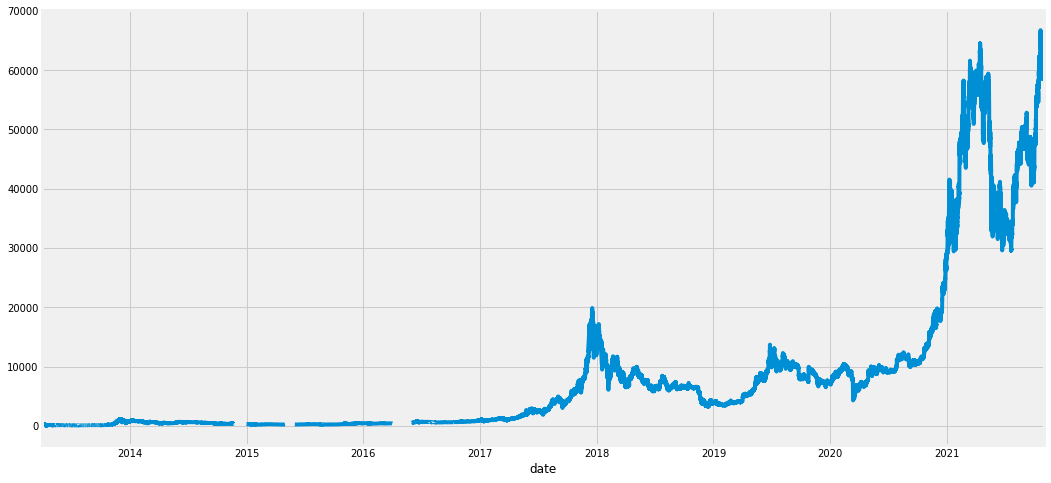

In [ ]:
#read data
df = pd.read_csv('/content/drive/MyDrive/Yoctobe Fintech/Datasets/btcusd30mn.csv', parse_dates=True)
df.head()
# #setting index as date because some statsmodels might not work
df.rename(columns={'datetime': 'date'}, inplace=True)
df.index = df['date']
df.index = pd.to_datetime(df.index)
#plot
df['close'].plot(figsize=(16,8))

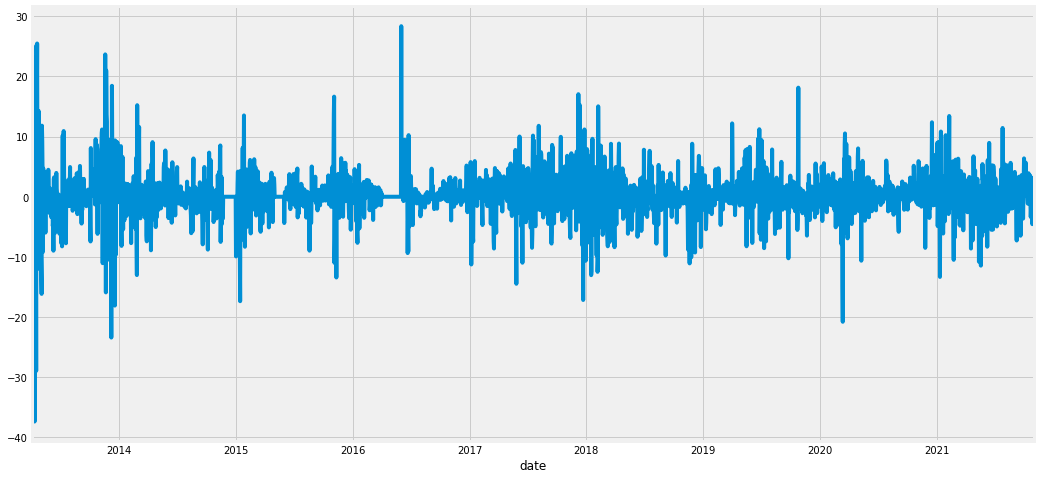

In [ ]:
ddf = df.resample("D").mean()
# compute the returns
returns = 100 * ddf['close'].pct_change().dropna()
ax = returns.plot(figsize=(16,8))
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

# GARCH
The default set of options produces a model with a constant mean, GARCH(1,1) conditional variance and normal errors.


Iteration:      5,   Func. Count:     37,   Neg. LLF: 7926.986733628112
Iteration:     10,   Func. Count:     69,   Neg. LLF: 7922.144192914838
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7922.143143870328
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7922.14
Distribution:                  Normal   AIC:                           15852.3
Method:            Maximum Likelihood   BIC:                           15876.5
                                        No. Observations:                 3136
Date:                Sat, Nov 20 2021   Df Residuals:                     3135
Time:         

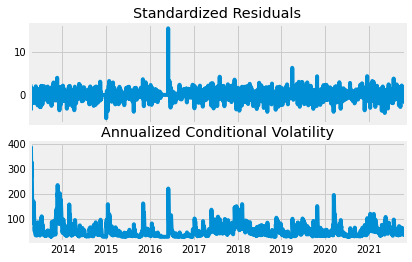

In [ ]:
am = arch_model(returns)
res = am.fit(update_freq=5)
print(res.summary())
fig = res.plot(annualize="D")

#GJR-GARCH


                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -7922.03
Distribution:                  Normal   AIC:                           15854.1
Method:            Maximum Likelihood   BIC:                           15884.3
                                        No. Observations:                 3136
Date:                Sat, Nov 20 2021   Df Residuals:                     3135
Time:                        19:45:24   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1756  6.061e-02      2.898  3.754e-03 [5.686e-0

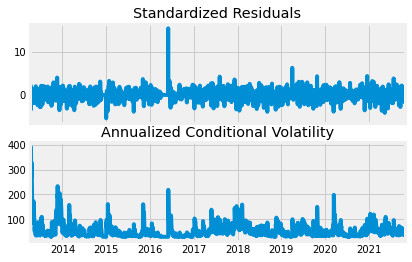

In [ ]:
am = arch_model(returns, p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
print(res.summary())
fig = res.plot(annualize="D")

#TARCH/ZARCH


In [ ]:
am = arch_model(returns, p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     44,   Neg. LLF: 7950.6757842744855
Iteration:     10,   Func. Count:     84,   Neg. LLF: 7941.3658873833465
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7941.336866868027
            Iterations: 14
            Function evaluations: 113
            Gradient evaluations: 14
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -7941.34
Distribution:                  Normal   AIC:                           15892.7
Method:            Maximum Likelihood   BIC:                           15922.9
                                        No. Observations:                 3136
Date:                Sat, Nov 20 2021   Df Residuals:                     3135
Time:      

#Student’s T Errors


In [ ]:
am = arch_model(returns, p=1, o=1, q=1, power=1.0, dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     47,   Neg. LLF: 7572.62749415611
Iteration:     10,   Func. Count:     92,   Neg. LLF: 7502.63631918888
Iteration:     15,   Func. Count:    137,   Neg. LLF: 7488.603432229005
Iteration:     20,   Func. Count:    180,   Neg. LLF: 7488.516477346237
Iteration:     25,   Func. Count:    249,   Neg. LLF: 7488.5149160747715
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7488.514898419419
            Iterations: 27
            Function evaluations: 269
            Gradient evaluations: 26
                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                        close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -7488.51
Distribution:      Standardized Student's t   AIC:                           14989.0
Metho

#Fixing Parameters


                      Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                         close   R-squared:                          --
Mean Model:                    Constant Mean   Adj. R-squared:                     --
Vol Model:                       TARCH/ZARCH   Log-Likelihood:               -7716.05
Distribution:       Standardized Student's t   AIC:                           15444.1
Method:            User-specified Parameters   BIC:                           15480.4
                                               No. Observations:                 3136
Date:                       Sat, Nov 20 2021                                         
Time:                               19:48:59                                         
      Mean Model     
                 coef
---------------------
mu             0.0235
   Volatility Model  
                 coef
---------------------
omega          0.0100
alpha[1]       0.0600
gamma[1]       0.0000
beta[1

(15797.0, 18932.0)

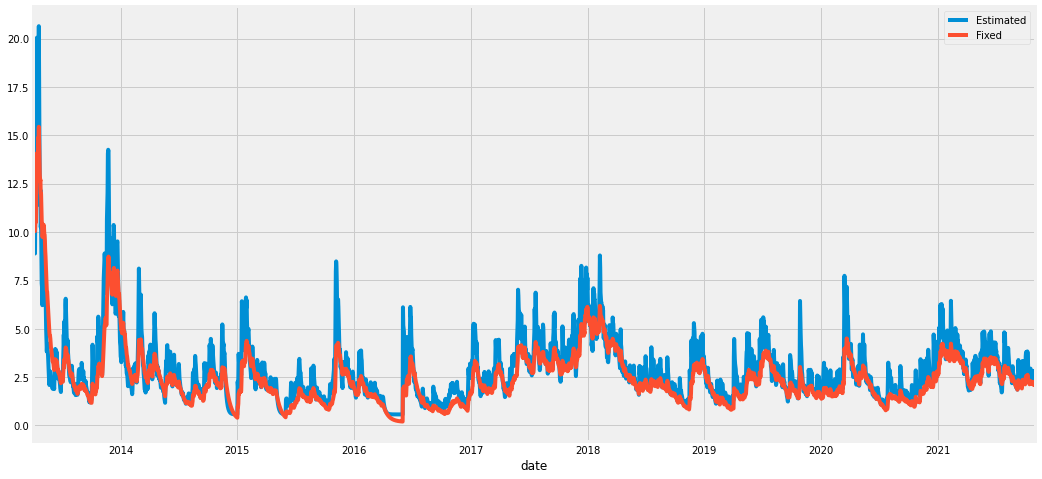

In [ ]:
fixed_res = am.fix([0.0235, 0.01, 0.06, 0.0, 0.9382, 8.0])
print(fixed_res.summary())
fdf = pd.concat([res.conditional_volatility, fixed_res.conditional_volatility], 1)
fdf.columns = ["Estimated", "Fixed"]
subplot = fdf.plot( figsize=(16, 8))
subplot.set_xlim(xlim)

#Building a Model From Components
##A mean model (arch.mean)




In [ ]:
from arch.univariate import ARX
returns = 100 * ddf['close'].pct_change(12).dropna()
ar = ARX(100 * returns, lags=[1, 3, 12])
print(ar.fit().summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:                  close   R-squared:                       0.901
Mean Model:                        AR   Adj. R-squared:                  0.901
Vol Model:          Constant Variance   Log-Likelihood:               -24016.0
Distribution:                  Normal   AIC:                           48041.9
Method:            Maximum Likelihood   BIC:                           48072.2
                                        No. Observations:                 3113
Date:                Sat, Nov 20 2021   Df Residuals:                     3109
Time:                        19:56:29   Df Model:                            4
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
Const          32.4576      9.304      3.488  4.8

## Volatility Processes


                           AR - ARCH Model Results                            
Dep. Variable:                  close   R-squared:                       0.900
Mean Model:                        AR   Adj. R-squared:                  0.900
Vol Model:                       ARCH   Log-Likelihood:               -23301.6
Distribution:                  Normal   AIC:                           46623.2
Method:            Maximum Likelihood   BIC:                           46683.6
                                        No. Observations:                 3113
Date:                Sat, Nov 20 2021   Df Residuals:                     3109
Time:                        19:58:31   Df Model:                            4
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const         18.9895      7.351      2.583  9.785e-

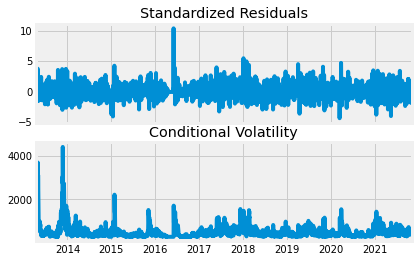

In [ ]:
from arch.univariate import ARCH, GARCH

ar.volatility = ARCH(p=5)
res = ar.fit(update_freq=0, disp="off")
print(res.summary())
fig = res.plot()


##Distributions

In [ ]:
from arch.univariate import StudentsT

ar.distribution = StudentsT()
res = ar.fit(update_freq=0, disp="off")
print(res.summary())

                              AR - ARCH Model Results                               
Dep. Variable:                        close   R-squared:                       0.900
Mean Model:                              AR   Adj. R-squared:                  0.900
Vol Model:                             ARCH   Log-Likelihood:               -23100.3
Distribution:      Standardized Student's t   AIC:                           46222.5
Method:                  Maximum Likelihood   BIC:                           46289.0
                                              No. Observations:                 3113
Date:                      Sat, Nov 20 2021   Df Residuals:                     3109
Time:                              19:59:37   Df Model:                            4
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
-----------------------------------------------------------------------------

# Forcasting
## Simulation forcasts

Iteration:      5,   Func. Count:     36,   Neg. LLF: 11564.85841678078
Iteration:     10,   Func. Count:     71,   Neg. LLF: 11420.8450998247
Iteration:     15,   Func. Count:    101,   Neg. LLF: 11406.713422318247
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 11406.713423185078
            Iterations: 15
            Function evaluations: 101
            Gradient evaluations: 15
                  h.1      h.2        h.3       h.4        h.5
date                                                          
2021-11-01  48.758486  54.7223  59.895672  60.99877  63.196156


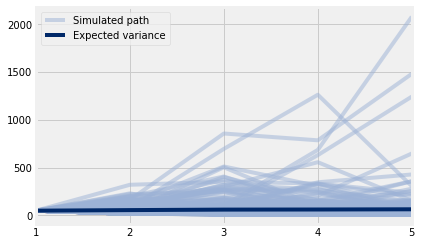

In [ ]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)
forecasts = res.forecast(horizon=5, method="simulation", reindex=False)
print(forecasts.residual_variance.iloc[-3:])
sims = forecasts.simulations

x = np.arange(1, 6)
lines = plt.plot(x, sims.residual_variances[-1, ::5].T, color="#9cb2d6", alpha=0.5)
lines[0].set_label("Simulated path")
line = plt.plot(x, forecasts.variance.iloc[-1].values, color="#002868")
line[0].set_label("Expected variance")
plt.gca().set_xticks(x)
plt.gca().set_xlim(1, 5)
legend = plt.legend()

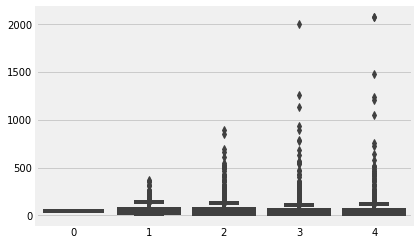

In [ ]:
import seaborn as sns

sns.boxplot(data=sims.variances[-1])

## Bootstrap Forecasts

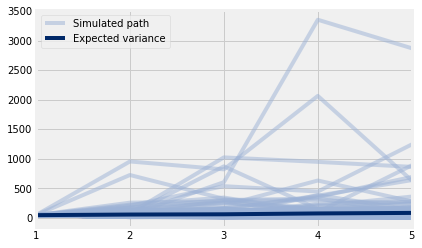

In [ ]:
forecasts = res.forecast(horizon=5, method="bootstrap", reindex=False)
sims = forecasts.simulations

lines = plt.plot(x, sims.residual_variances[-1, ::5].T, color="#9cb2d6", alpha=0.5)
lines[0].set_label("Simulated path")
line = plt.plot(x, forecasts.variance.iloc[-1].values, color="#002868")
line[0].set_label("Expected variance")
plt.gca().set_xticks(x)
plt.gca().set_xlim(1, 5)
legend = plt.legend()

##Value-at-Risk Forecasting - Parametric VaR



In [ ]:
forecasts = res.forecast(start="2020-1-1", reindex=False)
cond_mean = forecasts.mean["2020":]
cond_var = forecasts.variance["2020":]
q = am.distribution.ppf([0.01, 0.05], res.params[-2:])
print(q)

[-1.75737069 -1.36103475]


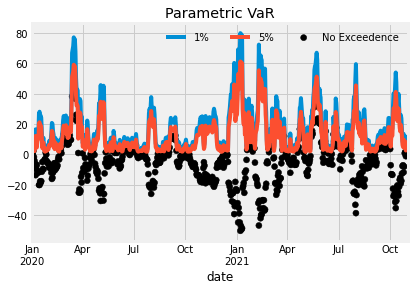

In [ ]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q[None, :]
value_at_risk = pd.DataFrame(value_at_risk, columns=["1%", "5%"], index=cond_var.index)
ax = value_at_risk.plot(legend=False)
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])
rets_2020 = returns["2020":].copy()
rets_2020.name = "BTCUSD Return"
c = []
for idx in value_at_risk.index:
    if rets_2020[idx] > -value_at_risk.loc[idx, "5%"]:
        c.append("#000000")
    elif rets_2020[idx] < -value_at_risk.loc[idx, "1%"]:
        c.append("#BB0000")
    else:
        c.append("#BB00BB")
c = np.array(c, dtype="object")
labels = {
    "#BB0000": "1% Exceedence",
    "#BB00BB": "5% Exceedence",
    "#000000": "No Exceedence",
}
markers = {"#BB0000": "x", "#BB00BB": "s", "#000000": "o"}
for color in np.unique(c):
    sel = c == color
    ax.scatter(
        rets_2020.index[sel],
        -rets_2020.loc[sel],
        marker=markers[color],
        c=c[sel],
        label=labels[color],
    )
ax.set_title("Parametric VaR")
leg = ax.legend(frameon=False, ncol=3)

##Filtered Historical Simulation


In [ ]:
std_rets = (returns[:"2019"] - res.params["mu"]) / res.conditional_volatility
std_rets = std_rets.dropna()
q = std_rets.quantile([0.01, 0.05])
print(q)

0.01   -1.944372
0.05   -1.385948
dtype: float64


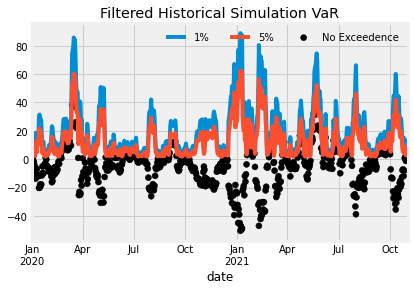

In [ ]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q.values[None, :]
value_at_risk = pd.DataFrame(value_at_risk, columns=["1%", "5%"], index=cond_var.index)
ax = value_at_risk.plot(legend=False)
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])
rets_2020 = returns["2020":].copy()
rets_2020.name = "BTCUSD Return"
c = []
for idx in value_at_risk.index:
    if rets_2020[idx] > -value_at_risk.loc[idx, "5%"]:
        c.append("#000000")
    elif rets_2020[idx] < -value_at_risk.loc[idx, "1%"]:
        c.append("#BB0000")
    else:
        c.append("#BB00BB")
c = np.array(c, dtype="object")
for color in np.unique(c):
    sel = c == color
    ax.scatter(
        rets_2020.index[sel],
        -rets_2020.loc[sel],
        marker=markers[color],
        c=c[sel],
        label=labels[color],
    )
ax.set_title("Filtered Historical Simulation VaR")
leg = ax.legend(frameon=False, ncol=3)